In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#### DATA OVERVIEW

In [2]:
df1 = pd.read_csv("D:\\Stroke_prediction_DS102\\data\\raw\\healthcare-dataset-stroke-data.csv")
df2 = pd.read_csv("D:\\Stroke_prediction_DS102\\data\\raw\\train_ajEneEa.csv")
df3 = pd.read_csv("D:\\Stroke_prediction_DS102\\data\\raw\\test_v2akXPA.csv")

In [3]:
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df2 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [5]:
common_rows = pd.merge(df1, df2, how='inner')
# => Không có giữu liệu trùng => vậy có thể merge 2 dataframe này để chạy

In [6]:
common_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3561,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
3562,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
3563,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
3564,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18601 entries, 0 to 18600
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18601 non-null  int64  
 1   gender             18601 non-null  object 
 2   age                18601 non-null  float64
 3   hypertension       18601 non-null  int64  
 4   heart_disease      18601 non-null  int64  
 5   ever_married       18601 non-null  object 
 6   work_type          18601 non-null  object 
 7   Residence_type     18601 non-null  object 
 8   avg_glucose_level  18601 non-null  float64
 9   bmi                18010 non-null  float64
 10  smoking_status     12850 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 1.6+ MB


In [10]:
df = pd.concat([df1, df2], ignore_index=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48505,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
48506,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
48507,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
48508,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [11]:
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48510 entries, 0 to 48509
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             48510 non-null  object 
 1   age                48510 non-null  float64
 2   hypertension       48510 non-null  int64  
 3   heart_disease      48510 non-null  int64  
 4   ever_married       48510 non-null  object 
 5   work_type          48510 non-null  object 
 6   Residence_type     48510 non-null  object 
 7   avg_glucose_level  48510 non-null  float64
 8   bmi                46847 non-null  float64
 9   smoking_status     35218 non-null  object 
 10  stroke             48510 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 4.1+ MB


In [13]:
df.nunique()

gender                   3
age                    104
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    12543
bmi                    555
smoking_status           4
stroke                   2
dtype: int64

In [14]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,48510,48510.000000,48510.000000,48510.000000,48510,48510,48510,48510.000000,46847.000000,35218,48510.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,28659,NaN,NaN,NaN,31291,27759,24352,NaN,NaN,17945,NaN
mean,NaN,42.324152,0.093981,0.048196,NaN,NaN,NaN,104.658132,28.635238,NaN,0.021274
std,NaN,22.531358,0.291805,0.214183,NaN,NaN,NaN,43.348186,7.779286,NaN,0.144298
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.000000,10.100000,NaN,0.000000
25%,NaN,24.000000,0.000000,0.000000,NaN,NaN,NaN,77.520000,23.300000,NaN,0.000000
50%,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.600000,27.800000,NaN,0.000000
75%,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,112.227500,32.900000,NaN,0.000000


In [15]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

#### MISSING VALUES


In [16]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1663
smoking_status       13292
stroke                   0
dtype: int64

In [17]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.428159
smoking_status       27.400536
stroke                0.000000
dtype: float64


In [18]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

C:\Users\Thy\AppData\Local\Temp\ipykernel_20136\1439978410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [19]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)

C:\Users\Thy\AppData\Local\Temp\ipykernel_20136\946677556.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)


In [20]:
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


#### PROCESSING


##### CHECK CATEGORY/OBJECT

In [21]:
# Xử lý không cân bằng nhãn dữ liệu
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [22]:
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} nhãn")

gender: 3 nhãn
ever_married: 2 nhãn
work_type: 5 nhãn
Residence_type: 2 nhãn
smoking_status: 4 nhãn


In [23]:
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))


--- gender ---
gender
Female    28659
Male      19839
Other        12
Name: count, dtype: int64

--- ever_married ---
ever_married
Yes    31291
No     17219
Name: count, dtype: int64

--- work_type ---
work_type
Private          27759
Self-employed     7612
children          6843
Govt_job          6097
Never_worked       199
Name: count, dtype: int64

--- Residence_type ---
Residence_type
Urban    24352
Rural    24158
Name: count, dtype: int64

--- smoking_status ---
smoking_status
never smoked       31237
formerly smoked     8378
smokes              7351
Unknown             1544
Name: count, dtype: int64


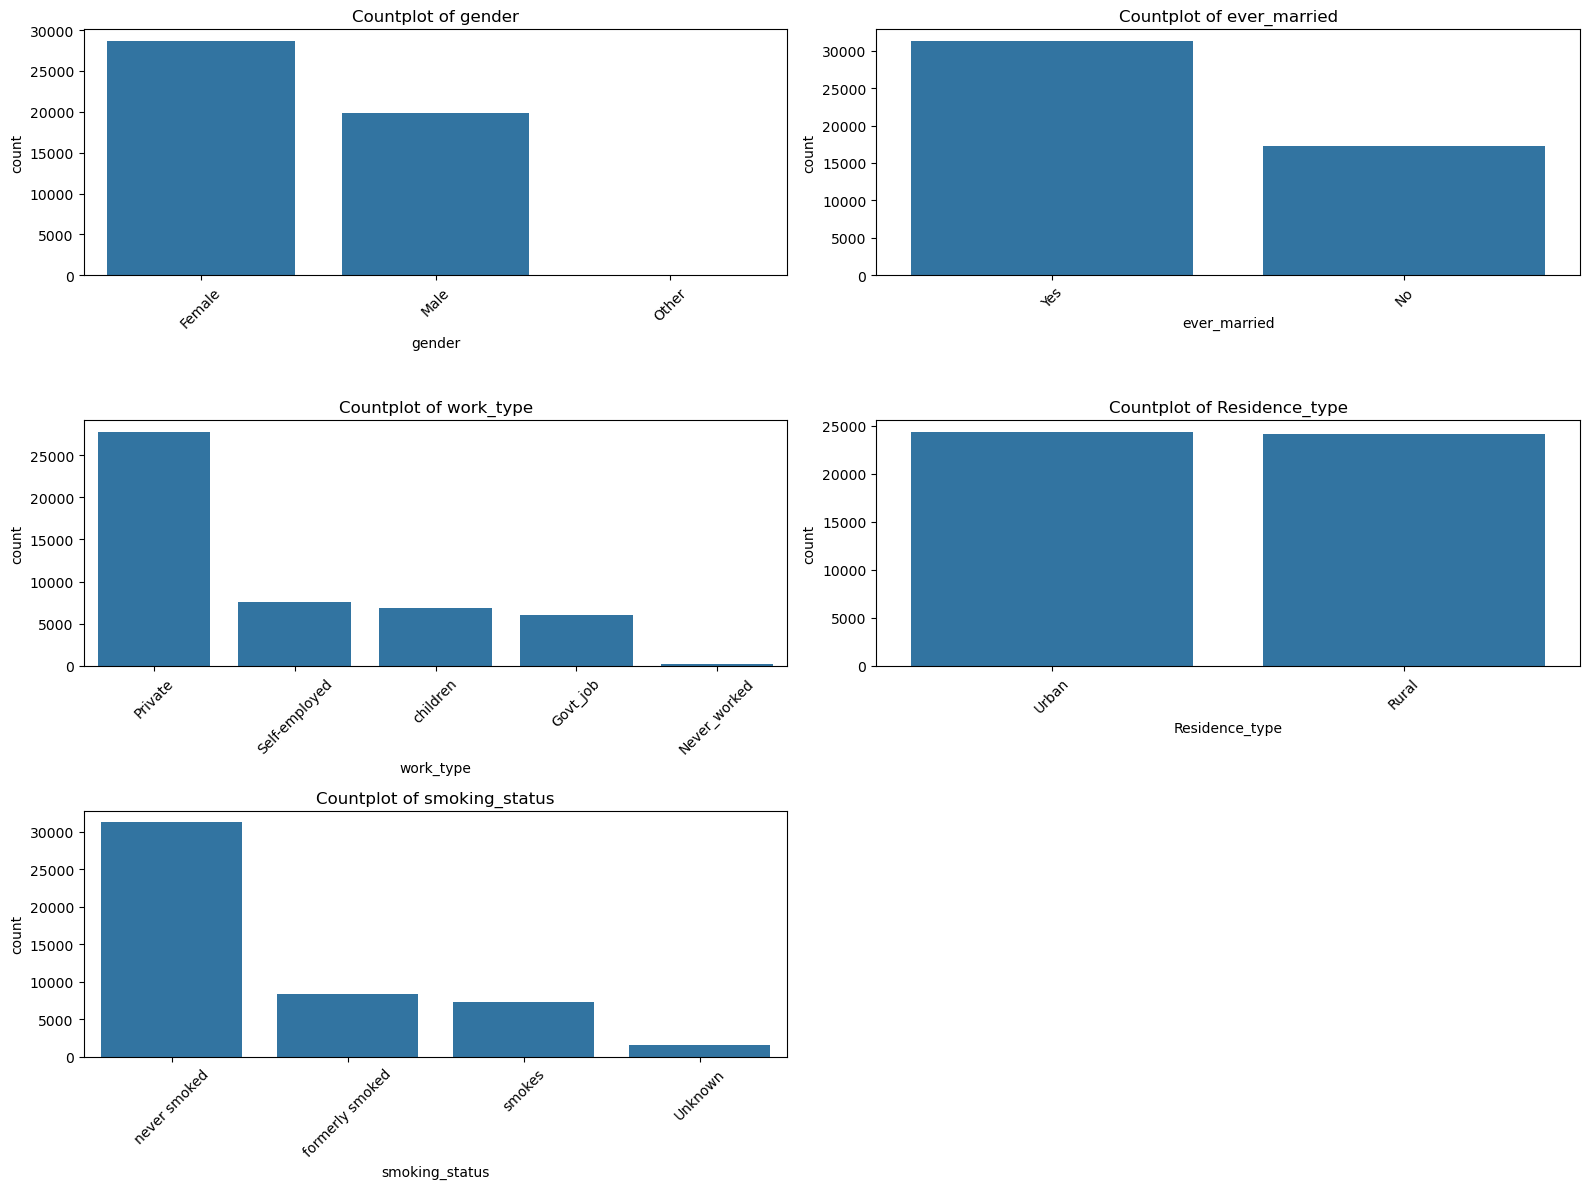

In [24]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

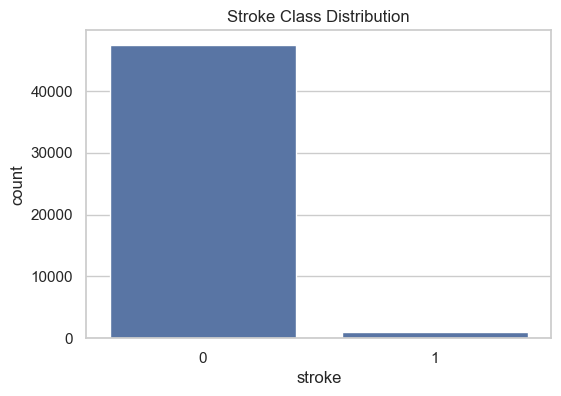

In [25]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df)
plt.title('Stroke Class Distribution')
plt.show()

In [26]:
for col in categorical_cols:
    print(df[col].value_counts(normalize=True) * 100)

gender
Female    59.078541
Male      40.896722
Other      0.024737
Name: proportion, dtype: float64
ever_married
Yes    64.504226
No     35.495774
Name: proportion, dtype: float64
work_type
Private          57.223253
Self-employed    15.691610
children         14.106370
Govt_job         12.568543
Never_worked      0.410225
Name: proportion, dtype: float64
Residence_type
Urban    50.199959
Rural    49.800041
Name: proportion, dtype: float64
smoking_status
never smoked       64.392909
formerly smoked    17.270666
smokes             15.153577
Unknown             3.182849
Name: proportion, dtype: float64


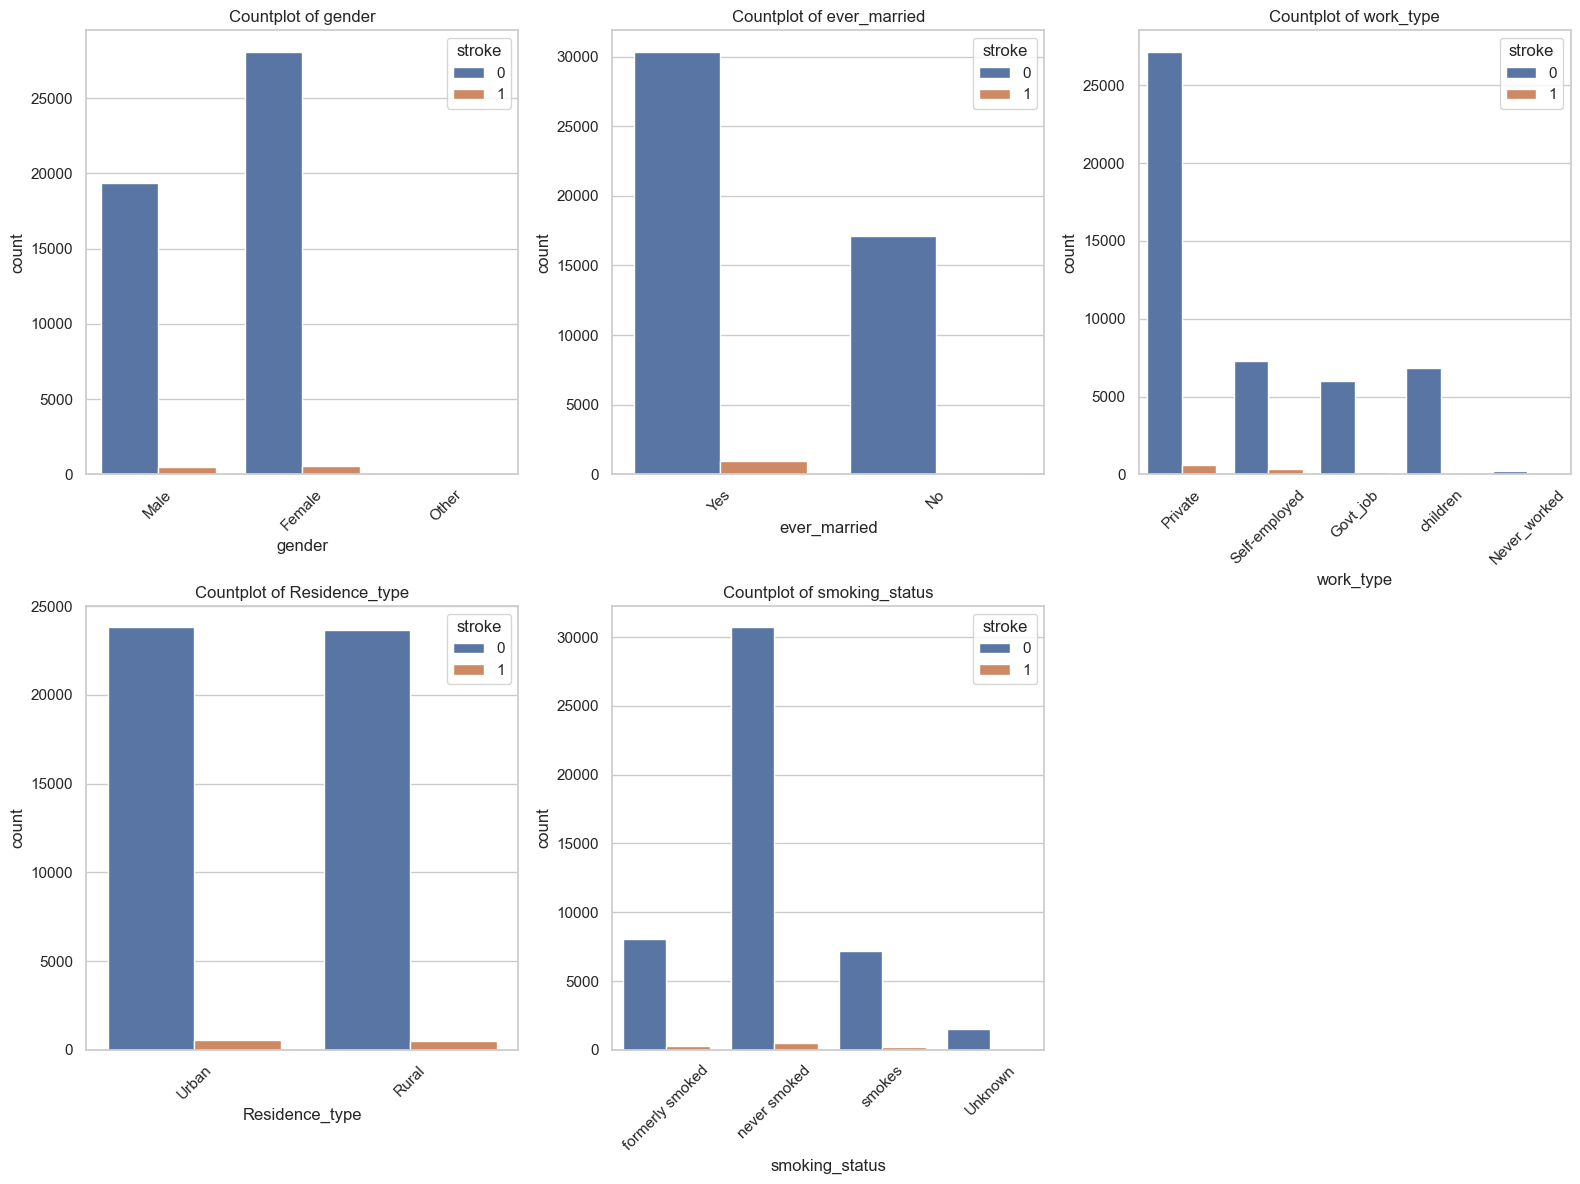

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, hue='stroke', data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [28]:
# => nhãn 'Other' chiếm ít nên sẽ loại bỏ
df = df[df['gender'] != 'Other']

In [29]:
# Gộp nhãn 'children' và 'Never_worked' thành 'Non_working' vì cùng ý nghĩa là không làm việc
df['work_type'] = df['work_type'].replace(['children', 'Never_worked'], 'Non_working')

C:\Users\Thy\AppData\Local\Temp\ipykernel_20136\2450449948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_type'] = df['work_type'].replace(['children', 'Never_worked'], 'Non_working')


CHECK NUMERICAL

In [30]:
#Kiểm tra dữ liệu số, và xử lý các giá trị ngoại lai outliers
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

In [31]:
df[numerical_cols].describe()

,age,avg_glucose_level,bmi
count,48498.000000,48498.000000,48498.000000
mean,42.326170,104.660962,28.606901
std,22.532447,43.351347,7.646754
min,0.080000,55.000000,10.100000
25%,24.000000,77.520000,23.500000
50%,44.000000,91.600000,27.800000
75%,60.000000,112.230000,32.700000
max,82.000000,291.050000,97.600000


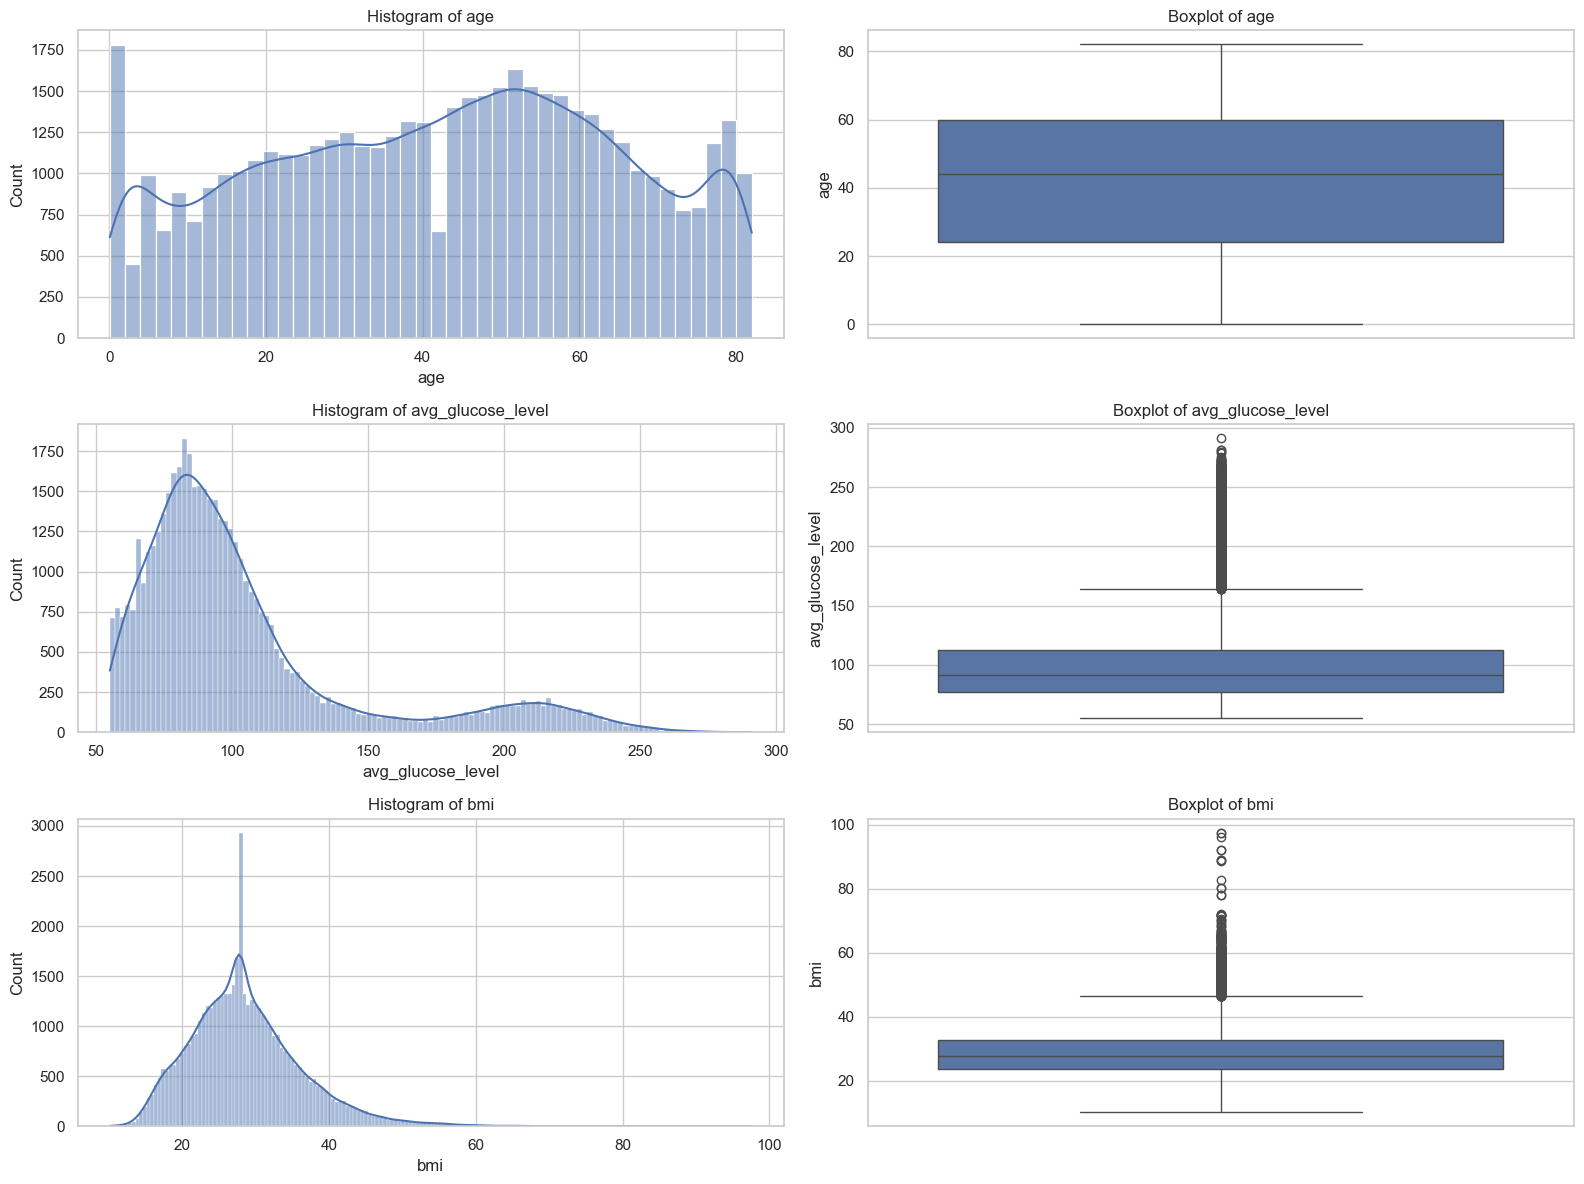

In [32]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, 2 * i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(3, 2, 2 * i + 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [33]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Áp dụng cho từng cột
for col in ['age', 'avg_glucose_level', 'bmi']:
    outliers = detect_outliers_iqr(df, col)
    print(f'{col}: {len(outliers)} outliers')


age: 0 outliers
avg_glucose_level: 5605 outliers
bmi: 1179 outliers


In [34]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['bmi'] = df['bmi'].clip(lower, upper)

C:\Users\Thy\AppData\Local\Temp\ipykernel_20136\751519577.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'] = df['bmi'].clip(lower, upper)


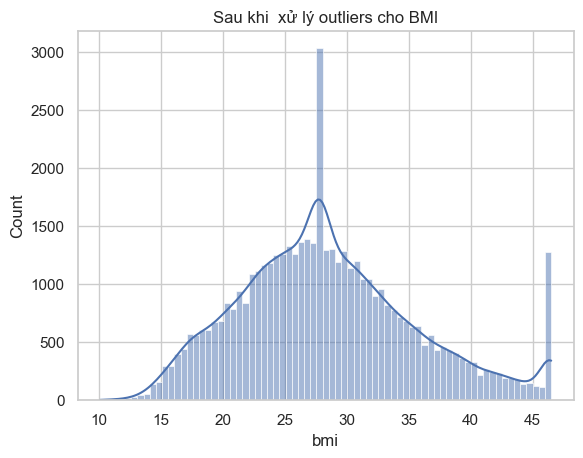

In [35]:
# Sau khi xử lý outliers
sns.histplot(df['bmi'], kde=True)
plt.title("Sau khi  xử lý outliers cho BMI")
plt.show()

In [36]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['avg_glucose_level'] = df['avg_glucose_level'].clip(lower, upper)


C:\Users\Thy\AppData\Local\Temp\ipykernel_20136\872154935.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_glucose_level'] = df['avg_glucose_level'].clip(lower, upper)


In [37]:
df[numerical_cols].skew()

age                 -0.106159
avg_glucose_level    0.921011
bmi                  0.473400
dtype: float64

In [38]:
df['avg_glucose_level'] = np.log1p(df['avg_glucose_level'])

C:\Users\Thy\AppData\Local\Temp\ipykernel_20136\1893291859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_glucose_level'] = np.log1p(df['avg_glucose_level'])


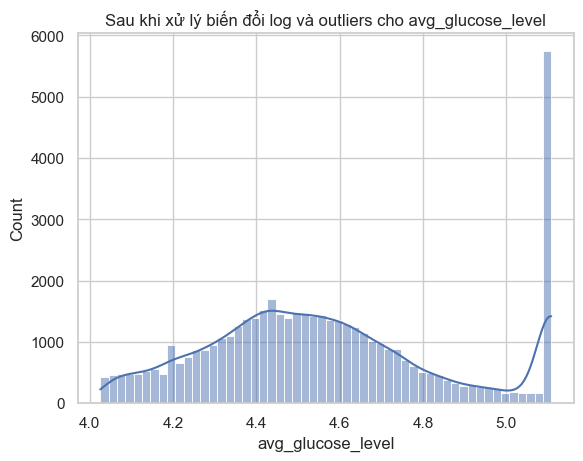

In [39]:
# Sau khi xử lý biến đổi log và outliers cho avg_glucose_level
sns.histplot(df['avg_glucose_level'], kde=True)
plt.title("Sau khi xử lý biến đổi log và outliers cho avg_glucose_level")
plt.show()

In [40]:
# 4. Tạo feature mới

# Age groups
df['age_group'] = pd.cut(df['age'], 
                            bins=[0, 18, 35, 50, 65, 100], 
                            labels=['Child', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])

# BMI categories
df['bmi_category'] = pd.cut(df['bmi'],
                                bins=[0, 18.5, 25, 30, 100],
                                labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Glucose level categories
# Nếu đã log-transform avg_glucose_level thì dùng:
bins = [0, np.log1p(100), np.log1p(140), np.log1p(1000)]
labels = ['Normal', 'Prediabetic', 'Diabetic']
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels)

# Risk score combination
df['risk_score'] = (
    (df['age'] > 65).astype(int) +
    (df['hypertension'] == 1).astype(int) +
    (df['heart_disease'] == 1).astype(int) +
    (df['avg_glucose_level'] > 140).astype(int) +
    (df['bmi'] > 30).astype(int)
)

print(f"   ✅ Đã tạo các features mới: age_group, bmi_category, glucose_category, risk_score")

   ✅ Đã tạo các features mới: age_group, bmi_category, glucose_category, risk_score


C:\Users\Thy\AppData\Local\Temp\ipykernel_20136\2847506793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'],
C:\Users\Thy\AppData\Local\Temp\ipykernel_20136\2847506793.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_category'] = pd.cut(df['bmi'],
C:\Users\Thy\AppData\Local\Temp\ipykernel_20136\2847506793.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [41]:
# 5. Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {}

for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        df[f'{col}_encoded'] = le.fit_transform(df[col])
        label_encoders[col] = le
# One-hot encoding cho các features mới
new_categorical = ['age_group', 'bmi_category', 'glucose_category']
for col in new_categorical:
    if col in df.columns:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)


print(f"\n✅ Hoàn thành tiền xử lý! Dataset có {df.shape[0]} dòng và {df.shape[1]} cột")



✅ Hoàn thành tiền xử lý! Dataset có 48498 dòng và 32 cột


C:\Users\Thy\AppData\Local\Temp\ipykernel_20136\2104786555.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_encoded'] = le.fit_transform(df[col])
C:\Users\Thy\AppData\Local\Temp\ipykernel_20136\2104786555.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_encoded'] = le.fit_transform(df[col])
C:\Users\Thy\AppData\Local\Temp\ipykernel_20136\2104786555.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

#### Feature Engineering

In [42]:
# Tạo interaction features
# Age-BMI interaction
df['age_bmi_interaction'] = df['age'] * df['bmi']

# Age-Glucose interaction
df['age_glucose_interaction'] = df['age'] * df['avg_glucose_level']

# Hypertension-Heart disease combination
df['hypertension_heart_combo'] = (
    df['hypertension'] + df['heart_disease']
)

print("   ✅ Đã tạo interaction features")

   ✅ Đã tạo interaction features


In [43]:
# 2. Polynomial features cho age
df['age_squared'] = df['age'] ** 2
df['bmi_squared'] = df['bmi'] ** 2

print("   ✅ Đã tạo polynomial features")

   ✅ Đã tạo polynomial features


In [44]:
# 3. Standardization cho numerical features

numerical_features = ['age', 'avg_glucose_level', 'bmi', 'age_bmi_interaction', 
                        'age_glucose_interaction', 'age_squared', 'bmi_squared']

In [45]:
# Lưu features gốc
from sklearn.preprocessing import StandardScaler

for feature in numerical_features:
    if feature in df.columns:
        df[f'{feature}_original'] = df[feature]

# Chuẩn hóa
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("   ✅ Đã chuẩn hóa numerical features")

   ✅ Đã chuẩn hóa numerical features


In [48]:
# Lưu dữ liệu đã xử lý vào file CSV
processed_data_path = "D:\\Stroke_prediction_DS102\\data\\processed\\processed_stroke_data.csv"
df.to_csv(processed_data_path, index=False)
print(f"✅ Đã lưu dữ liệu đã xử lý vào: {processed_data_path}")

✅ Đã lưu dữ liệu đã xử lý vào: D:\Stroke_prediction_DS102\data\processed\processed_stroke_data.csv
